In [1]:
# 1. Packages Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import files
upload = files.upload() # upload File_to_input ANN inputs swe from data dump

Saving File_to_input_ANN_Sweden.xlsx to File_to_input_ANN_Sweden.xlsx


In [3]:
inputs = pd.read_excel("File_to_input_ANN_Sweden.xlsx")
inputs_quarter = inputs.to_numpy()
pe = inputs_quarter[:,1]
pe = pe[0:114]

In [4]:
from scipy.interpolate import CubicSpline
x = np.arange(115) # x is the time datapoints or in our case 115 quarters
x = x[1:115]
y = pe # our real life input

cs = CubicSpline(x, y) # cs is a function of the quarterly datapoints
#cs(1.33)  # for the next montly iteration i need to calculate in 0,33 iterations
cs(1.66)

array(5.74173921)

In [1]:
xs = np.arange(1, 115, 0.33333)
#x1 = np.arange(2)
fig, ax = plt.subplots(figsize=(8.5, 4))
ax.plot(xs,cs(xs)) # the spline curve is very close a straight line.

NameError: ignored

Answer to my comment above. The Spline is a straight line because the interpolation iterations are too close (0,33). For higher frequency interpolation the line is not straight (See graph below).

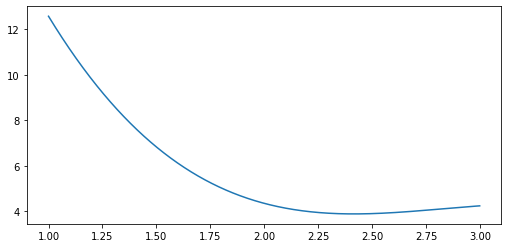

In [ ]:
xs = np.arange(1, 3, 0.001)
#x1 = np.arange(2)
fig, ax = plt.subplots(figsize=(8.5, 4))
ax.plot(xs,cs(xs)) # the spline curve is now not a straight line

In [10]:
xs = np.arange(1, 115, 0.33333)
pe_monthly = cs(xs)
pe_month_df = pd.DataFrame(pe_monthly)

'''
 The function below will export an xlsx file to the colab's file depository (look at your left). 
  Then i need to download this file to my desktop
'''

pe_month_df.to_excel('sample_data.xlsx', sheet_name='sheet1', index=False)